<a href="https://colab.research.google.com/github/degallardo/mcd_tesina/blob/main/Image_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading and resizing

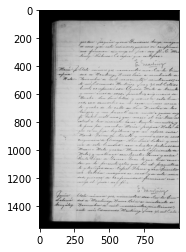

In [ ]:
img_path = '/content/drive/Othercomputers/My Computer (1)/dataset/no_bg_img/crop_img/TH-1942-22381-12195-66_NoBg_Left.png'
img = cv2.imread(img_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);

# Preprocessing

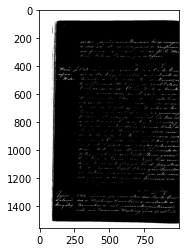

In [ ]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

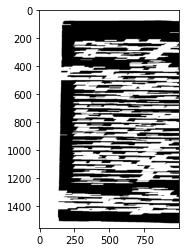

In [ ]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [ ]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

# Line segmentation

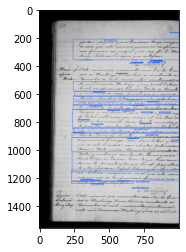

In [ ]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);

# Text segmentation

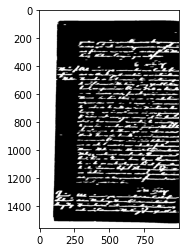

In [ ]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

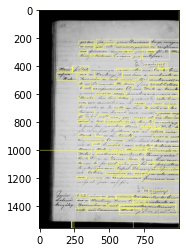

In [ ]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)
        
plt.imshow(img3);

945 967 380 440


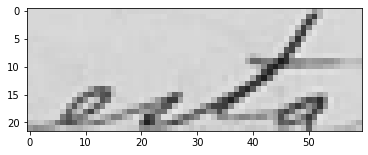

In [ ]:
ninth_word = words_list[580]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
print(ninth_word[1], ninth_word[3], ninth_word[0],ninth_word[2])
plt.imshow(roi_9);

In [ ]:
import glob
import os
from pathlib import Path

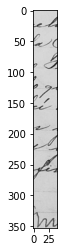

In [ ]:
folder_name = Path(img_path).stem
os.makedirs(os.path.join(os.path.dirname(img_path), folder_name), exist_ok=True)

counter = 0

for word in words_list:
  try:
    filename = os.path.join(os.path.dirname(img_path), folder_name, os.path.basename(img_path)).replace('.png', '_{:04d}_.png'.format(counter))
    img_word = img[ninth_word[1]:word[3], word[0]:word[2]]
    plt.imshow(img_word)
    plt.imsave(filename, img_word)
    counter+=1
  except:
    counter+=1
    pass

In [ ]:
counter

990

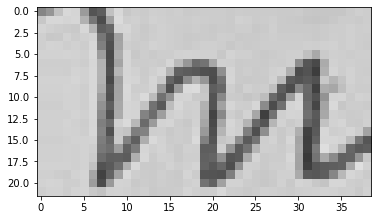

In [ ]:
for word in words_list:
  roi = img[word[1]:word[3], word[0]:word[2]]
  # cv2.imshow(roi)
  plt.imshow(roi)

# Pre-Processing

In [ ]:
from PIL import Image

In [ ]:
imgPath = '/content/drive/Othercomputers/My Computer (1)/dataset/no_bg_img/crop_img/TH-1942-22381-12195-66_NoBg_Left.png'

In [ ]:
img = cv2.imread(imgPath)

## Normalization

In [ ]:
norm_img = np.zeros((img.shape[0], img.shape[1]))
img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

## Skew Correction

In [ ]:
def deskew(image):

  # co_ords = np.column_stack(np.where(image > 0))
  co_ords = np.column_stack(np.where(image > 0))

  angle = cv2.minAreaRect(co_ords)[-1]

  if angle < -45:

    angle = -(90 + angle)

  else:

    angle = -angle

  (h, w) = image.shape[:2]

  center = (w // 2, h // 2)

  M = cv2.getRotationMatrix2D(center, angle, 1.0)

  rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC,  borderMode=cv2.BORDER_REPLICATE)

  return rotated

In [ ]:
imd = deskew(img)

error: ignored

## Image Scaling

In [ ]:
from PIL import Image

def set_image_dpi(file_path):

  im = Image.open(file_path)

  length_x, width_y = im.size

  factor = min(1, float(1024.0 / length_x))

  size = int(factor * length_x), int(factor * width_y)

  im_resized = im.resize(size, Image.ANTIALIAS)

  temp_file = temp_file.NamedTemporaryFile(delete=False, suffix='.png')

  temp_filename = temp_file.name

  im_resized.save(temp_filename, dpi=(300, 300))

  return temp_filename

## Noise Removal

In [ ]:
def remove_noise(image):
  return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

In [ ]:
img_remnoise = remove_noise(img)

## Thinning and Skeletonization

In [ ]:
img = cv2.imread(imgPath, 0)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
# Thinning and Skeletonization

## Gray Scale image

In [ ]:
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
img = get_grayscale(img)

error: ignored

## Thresholding or Binarization

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def thresholding(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) [1]

In [ ]:
img = thresholding(img)

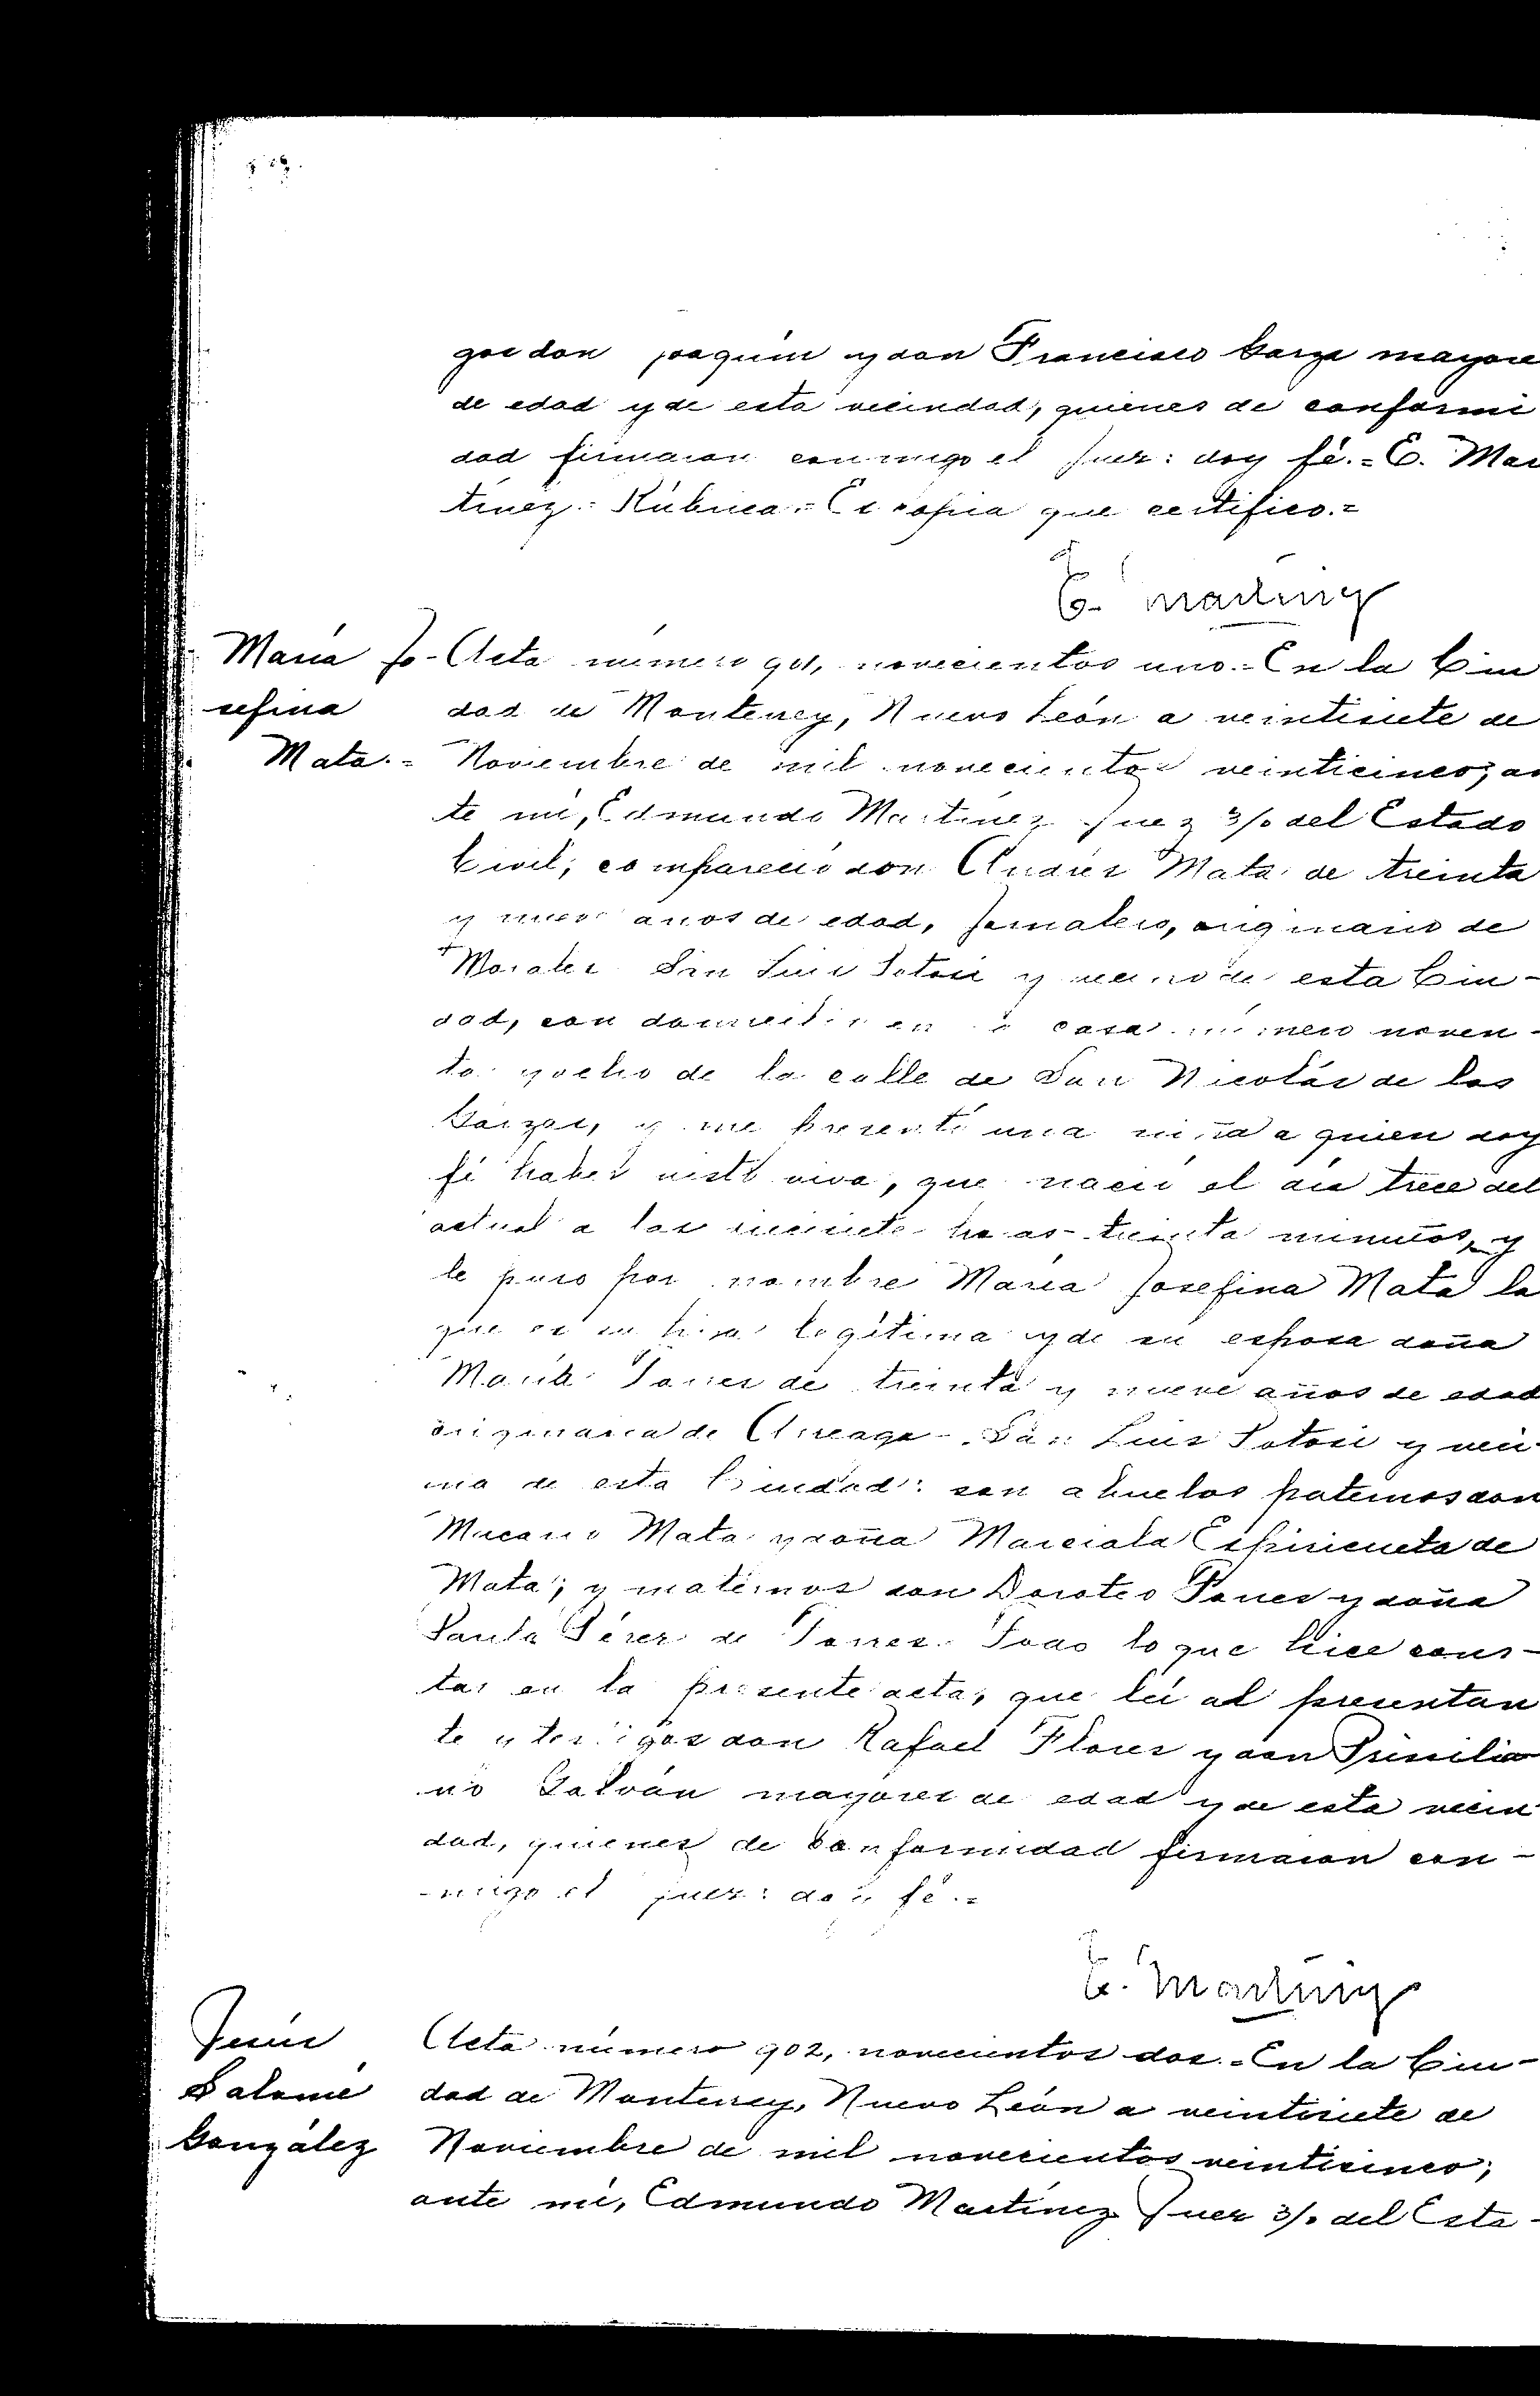

In [ ]:
cv2_imshow(img)

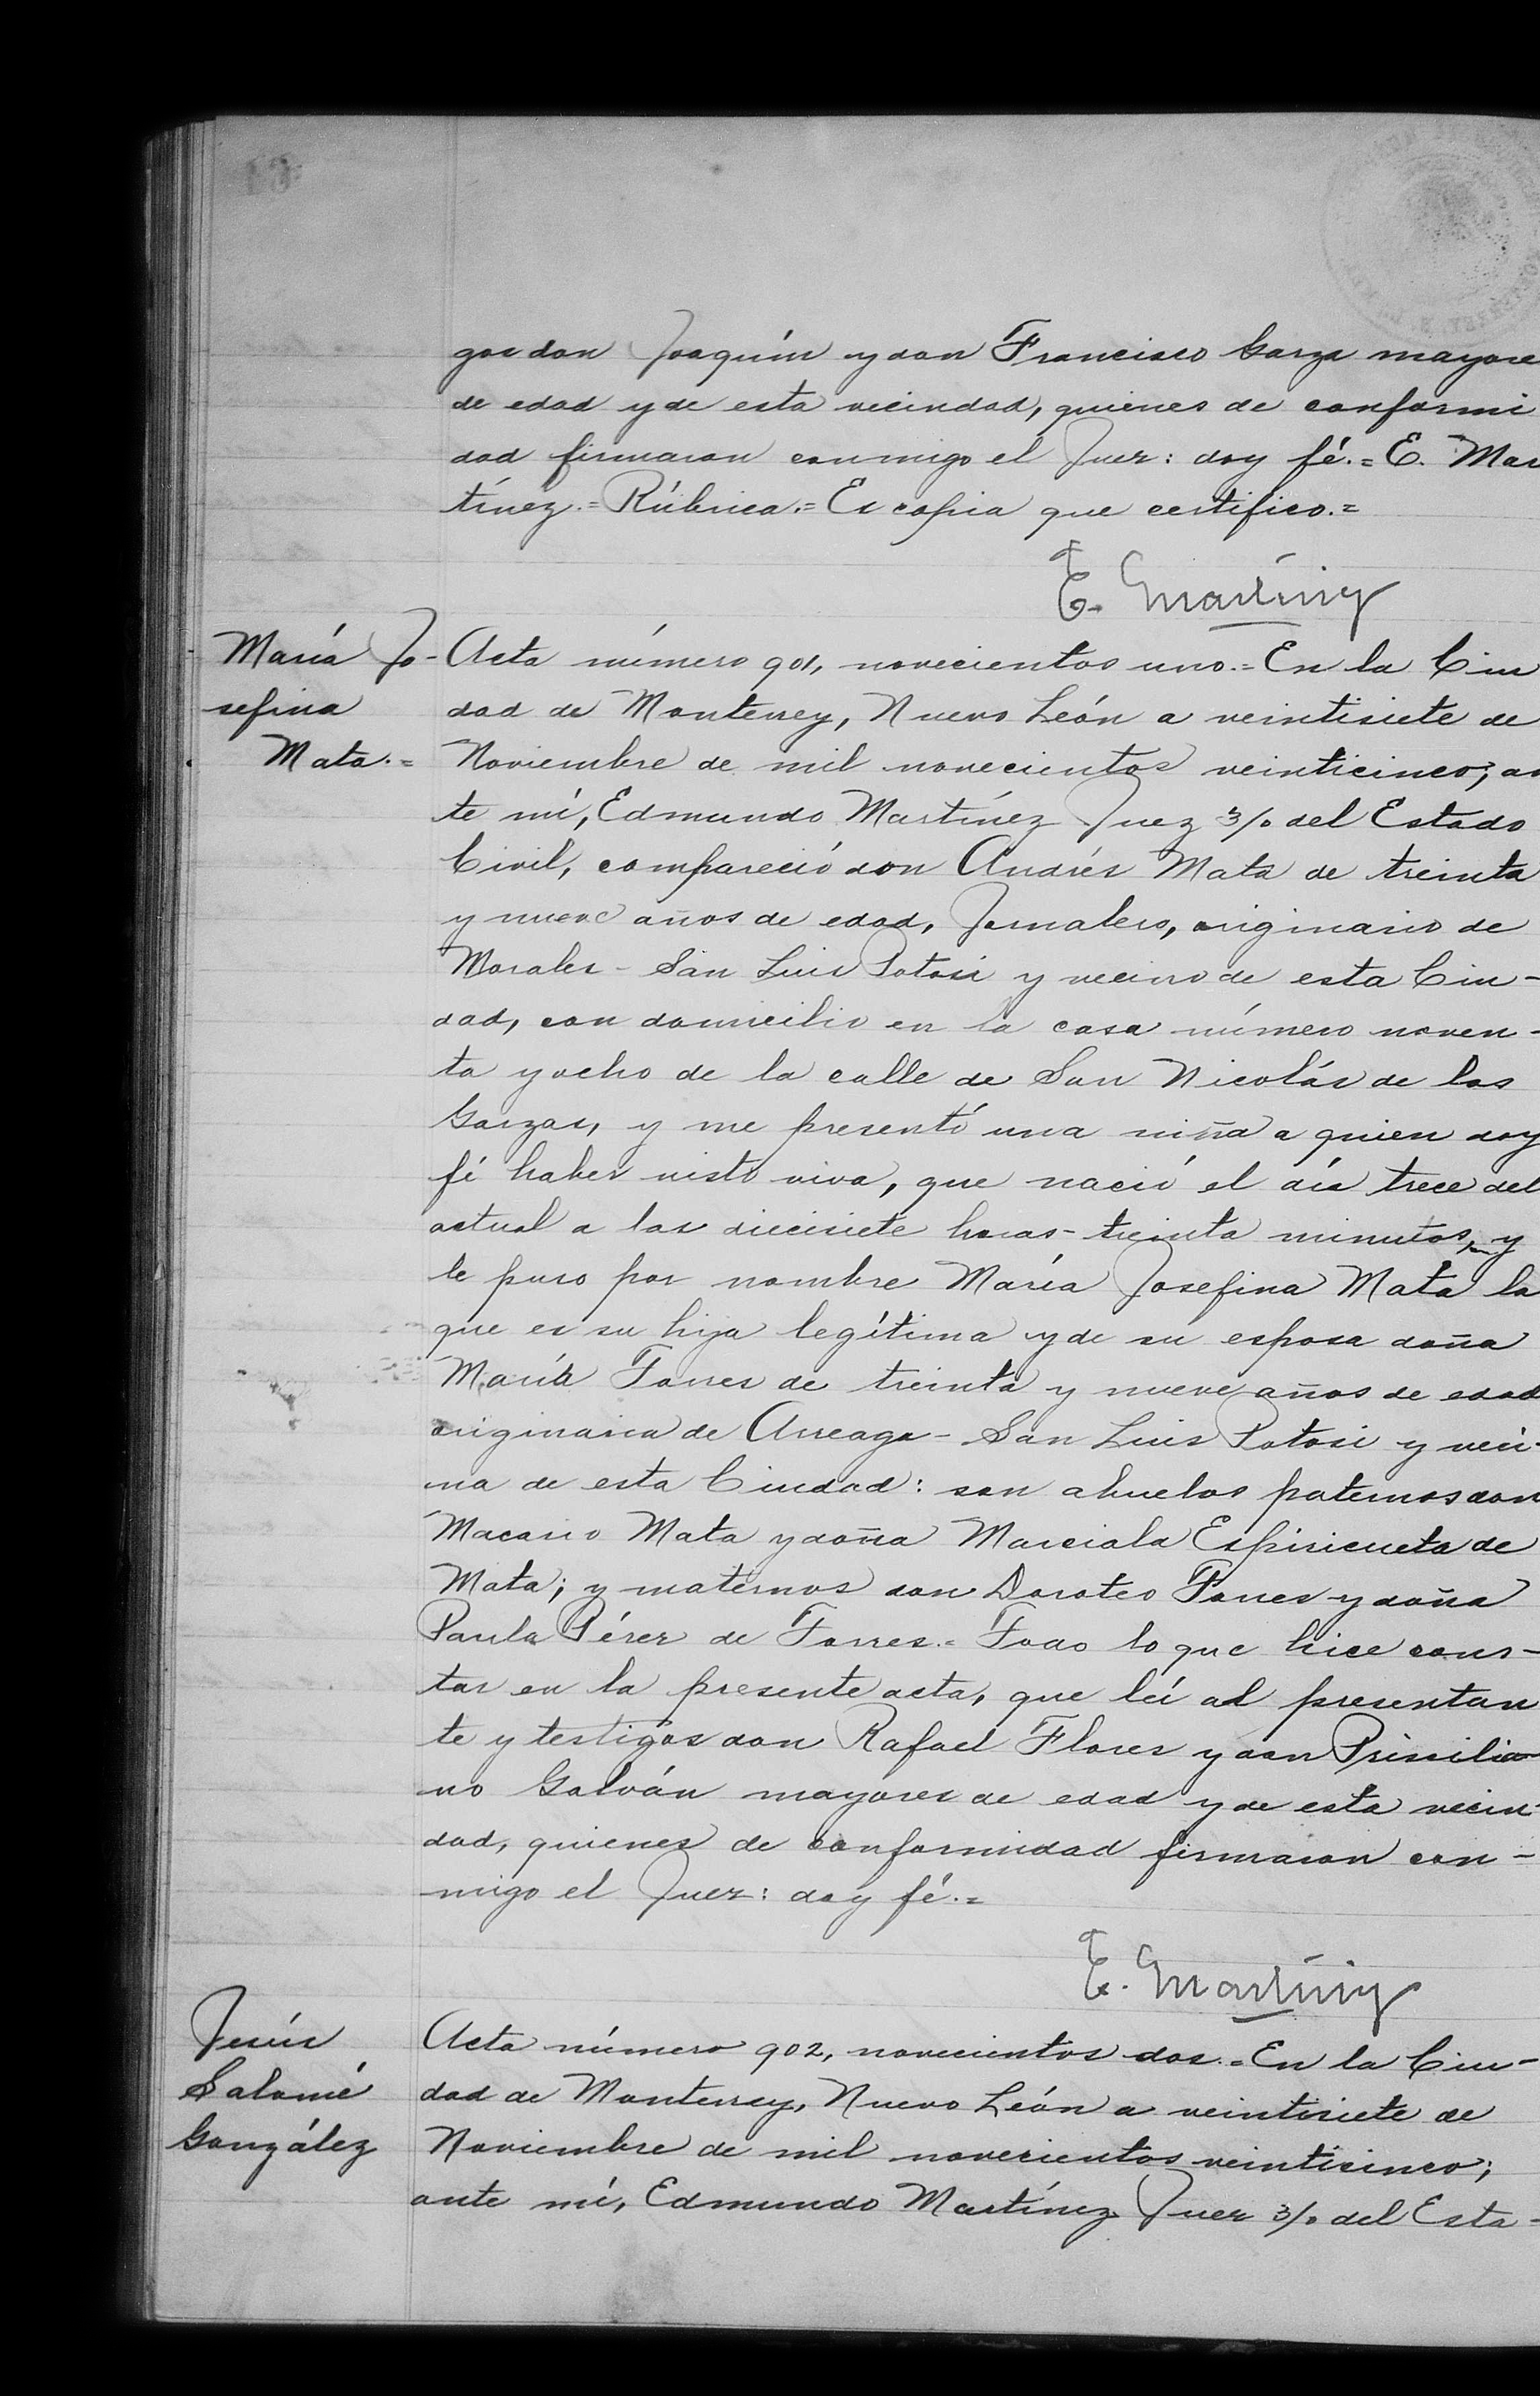

In [ ]:
cv2_imshow(cv2.imread(imgPath))